# 4.1 文本数据的读取与存储

## 4.1.1 CSV文件的读取

### pandas库提供了将表格型数据读取为DataFrame数据结构的函数。在现实应用中，常用的有read_csv和read_table函数

In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import csv

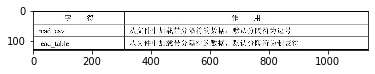

In [5]:
img = plt.imread('./read.jpg')
plt.imshow(img)

In [6]:
fp = open('./num.csv','w',newline='')
writer = csv.writer(fp)
writer.writerow(('id','name','grade'))
writer.writerow(('1','lucky','87'))
writer.writerow(('2','peter','92'))
writer.writerow(('3','lili','85'))
fp.close()

### 除了通过打开文件查看数据外，还可以通过type方法查看数据,type方法只适用于Windows系统，UNIX系统使用！cat命令。

In [8]:
!type .\num.csv

id,name,grade
1,lucky,87
2,peter,92
3,lili,85


### 由于创建的文件是标准的CSV文件，所以使用read_csv函数读取即可

In [14]:
df = pd.read_csv(open('./num.csv'))
df

,id,name,grade
0,1,lucky,87
1,2,peter,92
2,3,lili,85


#### 注意：读取CSV文件时，如果文件路径中有中文，需要加open函数，否则会报错。

### 对于CSV文件，也可以使用read_table进行读取，指定分隔符即可

In [15]:
df = pd.read_table(open('./num.csv'),sep=',')
df

,id,name,grade
0,1,lucky,87
1,2,peter,92
2,3,lili,85


### 但实际应用中，CSV文件的格式并不会如此规整。下面通过几个例子来讲解read_csv函数的参数（read_table函数参数也相同）使用，以解决各种CSV文件的读取方法。

### 1．指定列作为索引

###   默认情况下，读取的DataFrame的行索引是从0开始进行计数。以前面的CSV文件为例，读者可自由指定列为行索引。例如，通过index_col参数指定id列为行索引默认情况下，读取的DataFrame的行索引是从0开始进行计数。以前面的CSV文件为例，读者可自由指定列为行索引。例如，通过index_col参数指定id列为行索引默认情况下，读取的DataFrame的行索引是从0开始进行计数。以前面的CSV文件为例，读者可自由指定列为行索引。例如，通过index_col参数指定id列为行索引   

In [17]:
df = pd.read_csv(open('./num.csv'),index_col='id')
df

,name,grade
id,,
1,lucky,87
2,peter,92
3,lili,85


### 如果希望多个列做成一个层次化索引，传入列编号或者列名组成的列表即可。

In [22]:
fp = open('./num1.csv','w',newline='')
writer = csv.writer(fp)
writer.writerow(('school','id','name','grade'))
writer.writerow(('a','1','lucky','87'))
writer.writerow(('a','2','peter','92'))
writer.writerow(('a','3','lili','85'))
writer.writerow(('b','1','coco','78'))
writer.writerow(('b','2','kevin','87'))
writer.writerow(('b','3','heven','96'))
fp.close()

In [23]:
!type .\num1.csv

school,id,name,grade
a,1,lucky,87
a,2,peter,92
a,3,lili,85
b,1,coco,78
b,2,kevin,87
b,3,heven,96


In [25]:
df = pd.read_csv(open('./num1.csv'),index_col=[0,'id'])
df

name  grade
school id              
a      1   lucky     87
       2   peter     92
       3    lili     85
b      1    coco     78
       2   kevin     87
       3   heven     96

### 有些情况下，CSV文件没有标题行

In [31]:
fp = open('./num2.csv','w',newline='')
writer = csv.writer(fp)
writer.writerow(('1','lucky','87'))
writer.writerow(('2','peter','92'))
writer.writerow(('3','lili','85'))
fp.close()

In [32]:
!type .\num2.csv

1,lucky,87
2,peter,92
3,lili,85


### 如果使用默认情况读取，会指定第一行为标题行，这是不符合实际情况的

In [33]:
df = pd.read_csv(open('./num2.csv'))
df

,1,lucky,87
0,2,peter,92
1,3,lili,85


### 读取该文件的方法有两种，一种是通过header参数分配默认的标题行

In [34]:
df = pd.read_csv('./num2.csv',header=None)
df

,0,1,2
0,1,lucky,87
1,2,peter,92
2,3,lili,85


### 另一种方法是通过names参数给其指定列名

In [35]:
df = pd.read_csv('./num2.csv',names=['id','name','grade'])
df

,id,name,grade
0,1,lucky,87
1,2,peter,92
2,3,lili,85


### 由于数据原因或者数据分析的需要，有时可能只需选择读取部分行或列。首先看一下数据情况

In [41]:
fp = open('./num3.csv','w',newline='')
writer = csv.writer(fp)
writer.writerow('#this is grade')
writer.writerow(('id','name','grade'))
writer.writerow(('1','lucky','87'))
writer.writerow(('2','peter','92'))
writer.writerow(('3','lili','85'))
writer.writerow('#time')
fp.close()

In [42]:
!type .\num3.csv

#,t,h,i,s, ,i,s, ,g,r,a,d,e
id,name,grade
1,lucky,87
2,peter,92
3,lili,85
#,t,i,m,e


In [37]:
df = pd.read_csv('./num3.csv',skiprows=[0,5])
df

,id,name,grade
0,1,lucky,87
1,2,peter,92
2,3,lili,85


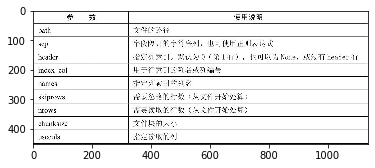

In [47]:
img1 = plt.imread('./read_csv.jpg')
plt.imshow(img1)

### 4.1.2 TXT文件的读取

### TXT文件使用的分隔符可能并不是逗号，这里创建一个分隔符为“? ”的TXT文档

In [48]:
fp = open('./num4.txt','a+')
fp.writelines('id? name? grade?'+'\n')
fp.writelines('1? lucky?87'+'\n')
fp.writelines('2? peter?92'+'\n')
fp.writelines('3? lili?85'+'\n')
fp.close()

In [49]:
!type .\num4.txt

id? name? grade?
1? lucky?87
2? peter?92
3? lili?85


In [50]:
df = pd.read_table(open('./num4.txt'),sep='?')
df

,id,name,grade,Unnamed: 3
0,1,lucky,87,NaN
1,2,peter,92,NaN
2,3,lili,85,NaN


### 现实情况中，有些TXT文件并没有固定的分隔符，而是用一些数量不定的空白符进行分隔。

In [51]:
fp = open('./num5.txt','a+')
fp.writelines('id   name   grade '+'\n')
fp.writelines('1     lucky  87'+'\n')
fp.writelines('2    peter     92'+'\n')
fp.writelines('3   lili      85'+'\n')
fp.close()

In [52]:
!type .\num5.txt

id   name   grade 
1     lucky  87
2    peter     92
3   lili      85


### 这种情况下也可以手动处理，但数据量过多时，手动处理就会很耗时。本例可通过正则表达式来处理

In [53]:
df = pd.read_table(open('./num5.txt'),sep='\s+')
df

,id,name,grade
0,1,lucky,87
1,2,peter,92
2,3,lili,85


## 4.1.3 文本数据的存储

### 在对数据进行处理和分析之后，通常会把数据存储起来。下面以前面的一个CSV文件为例讲解数据存储的方法

In [58]:
fp = open('./num.csv','w',newline='')
writer = csv.writer(fp)
writer.writerow(('id','name','grade'))
writer.writerow(('1','lucky','87'))
writer.writerow(('2','peter','92'))
writer.writerow(('3','lili','85'))
fp.close()

In [59]:
df = pd.read_csv(open('./num.csv'))
df

,id,name,grade
0,1,lucky,87
1,2,peter,92
2,3,lili,85


### 利用DataFrame的to_csv方法，可以将数据存储到以逗号分隔的CSV文件中

In [60]:
df.to_csv('./out.csv')
!type .\out.csv

,id,name,grade
0,1,lucky,87
1,2,peter,92
2,3,lili,85


In [61]:
df.to_csv('./out1.csv',sep='?')
!type .\out1.csv

?id?name?grade
0?1?lucky?87
1?2?peter?92
2?3?lili?85


### 这种情况下会存储行和列索引，我们可以通过设置index和header分别处理行和列索引

In [62]:
df.to_csv('./out2.csv',index=False)
!type .\out2.csv

id,name,grade
1,lucky,87
2,peter,92
3,lili,85
